In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os

# Transferrnig Hyperparameters

In [2]:
rays = "/Users/Blake Bullwinkel/Documents/Harvard/denn/experiments/runs/RAYS_run/animation"

In [5]:
y0s = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
preds = [np.load(os.path.join(rays, f"pred_pred_{str(y0)}.npy")) for y0 in y0s]
solns = [np.load(os.path.join(rays, f"soln_pred_{str(y0)}.npy")) for y0 in y0s]

In [6]:
means = [[0.74507886, 0.3602802 ],
        [0.40147605, 0.06139579],
        [0.94162198, 0.46722697],
        [0.79110703, 0.8973808 ],
        [0.64732527, 0.07095655],
        [0.10083943, 0.31935057],
        [0.24929806, 0.60499613],
        [0.11377013, 0.42598647],
        [0.85163671, 0.26495608],
        [0.18439795, 0.31438099]]

x1 = np.linspace(-0.1, 1.1, 500)
y1 = np.linspace(-0.2, 1.1, 500)
x, y = np.meshgrid(x1, y1)
A = 0.1
sig = 0.1
V = 0
for i in means:
    muX1 = i[0]
    muY1 = i[1]
    V += -A*np.exp(-(((x-muX1)**2 + (y-muY1)**2) / sig**2)/2) 

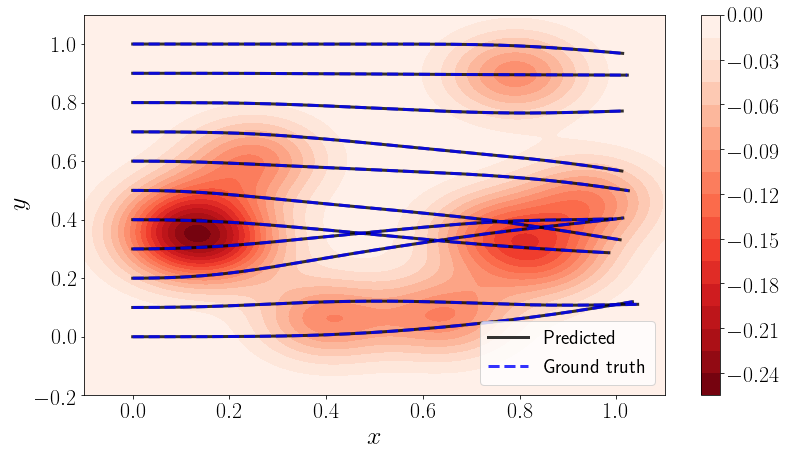

In [11]:
fig, ax = plt.subplots(figsize=(13,7))
plt.rc('axes', titlesize=26, labelsize=26)
plt.rc('legend', fontsize=20)
plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=22)
plt.rcParams['text.usetex'] = True
for i, (pred, soln) in enumerate(zip(preds, solns)):
    if i == 0:
        ax.plot(pred[:,0], pred[:,1], lw=3, color='black', alpha=0.8, label='Predicted')
        ax.plot(soln[:,0], soln[:,1], lw=3, linestyle='dashed', color='blue', alpha=0.8, label='Ground truth')
    else:
        ax.plot(pred[:,0], pred[:,1], lw=3, color='black', alpha=0.8)
        ax.plot(soln[:,0], soln[:,1], lw=3, linestyle='dashed', color='blue', alpha=0.8)
cf = ax.contourf(x1, y1, V, cmap='Reds_r', levels=20)
cbar = fig.colorbar(cf)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc='lower right')
#plt.show()
plt.savefig('rays2d.png', bbox_inches='tight', dpi=300)
# plt.savefig('rays2d_11head_base.png', bbox_inches='tight', dpi=300)

# Transferring Weights (Multi-Headed)

In [2]:
rays = "/Users/Blake Bullwinkel/Documents/Harvard/denn/experiments/runs/RAYS_run"

In [17]:
means = [[0.74507886, 0.3602802 ],
        [0.40147605, 0.06139579],
        [0.94162198, 0.46722697],
        [0.79110703, 0.8973808 ],
        [0.64732527, 0.07095655],
        [0.10083943, 0.31935057],
        [0.24929806, 0.60499613],
        [0.11377013, 0.42598647],
        [0.85163671, 0.26495608],
        [0.18439795, 0.31438099]]

x1 = np.linspace(-0.1, 1.1, 500)
y1 = np.linspace(-0.3, 1.1, 500)
x, y = np.meshgrid(x1, y1)
A = 0.1
sig = 0.1
V = 0
for i in means:
    muX1 = i[0]
    muY1 = i[1]
    V += -A*np.exp(-(((x-muX1)**2 + (y-muY1)**2) / sig**2)/2) 

## Base

In [16]:
base_pred_dict = np.load(os.path.join(rays, "pred_dict_base.npy"), allow_pickle=True)[()]

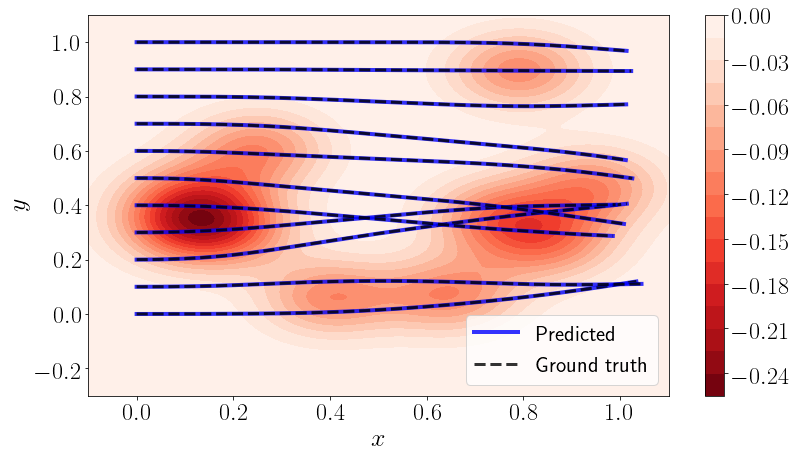

In [19]:
fig, ax = plt.subplots(figsize=(13,7))
plt.rc('axes', titlesize=26, labelsize=26)
plt.rc('legend', fontsize=22)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rcParams['text.usetex'] = True
for i, (y0, d) in enumerate(base_pred_dict.items()):
    x_hat = d['$\\hat{x}$']
    y_hat = d['$\\hat{y}$']
    x = d['$x$']
    y = d['$y$']
    if i == 0:
        ax.plot(x_hat, y_hat, lw=4, color='blue', alpha=0.8, label='Predicted')
        ax.plot(x, y, lw=3, linestyle='dashed', color='black', alpha=0.8, label='Ground truth')
    else:
        ax.plot(x_hat, y_hat, lw=4, color='blue', alpha=0.8)
        ax.plot(x, y, lw=3, linestyle='dashed', color='black', alpha=0.8)
cf = ax.contourf(x1, y1, V, cmap='Reds_r', levels=20)
cbar = fig.colorbar(cf)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc='lower right')
# plt.show()
plt.savefig('rays2d_11head_base.png', bbox_inches='tight', dpi=300)

## Transfer

In [20]:
transfer_pred_dict = np.load(os.path.join(rays, "pred_dict_transfer.npy"), allow_pickle=True)[()]

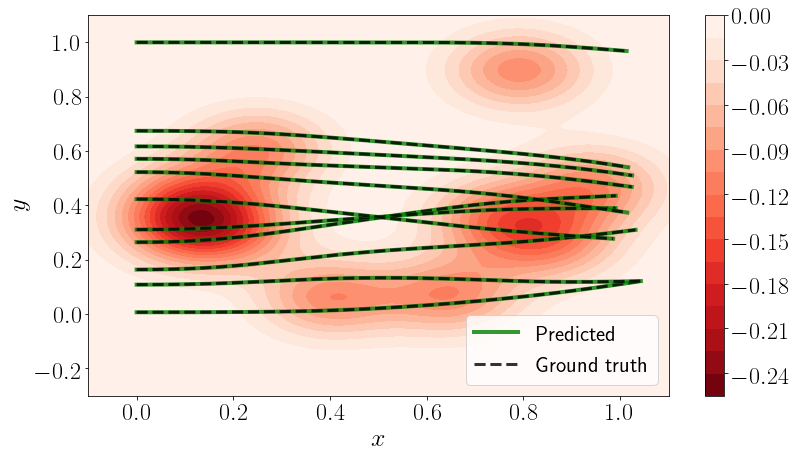

In [22]:
fig, ax = plt.subplots(figsize=(13,7))
plt.rc('axes', titlesize=26, labelsize=26)
plt.rc('legend', fontsize=22)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rcParams['text.usetex'] = True
for i, (y0, d) in enumerate(transfer_pred_dict.items()):
    x_hat = d['$\\hat{x}$']
    y_hat = d['$\\hat{y}$']
    x = d['$x$']
    y = d['$y$']
    if i == 0:
        ax.plot(x_hat, y_hat, lw=4, color='green', alpha=0.8, label='Predicted')
        ax.plot(x, y, lw=3, linestyle='dashed', color='black', alpha=0.8, label='Ground truth')
    else:
        ax.plot(x_hat, y_hat, lw=4, color='green', alpha=0.8)
        ax.plot(x, y, lw=3, linestyle='dashed', color='black', alpha=0.8)
cf = ax.contourf(x1, y1, V, cmap='Reds_r', levels=20)
cbar = fig.colorbar(cf)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc='lower right')
# plt.show()
plt.savefig('rays2d_11head_transfer.png', bbox_inches='tight', dpi=300)

In [42]:
transfer_y0 = np.sort(np.random.uniform(0, 1, 11))
transfer_y0

array([0.00629415, 0.10790965, 0.16338743, 0.26396311, 0.31055611,
       0.42259726, 0.52199343, 0.57089518, 0.61662052, 0.67387798,
       0.99927758])

## MSE / Loss Plots

In [11]:
mses_base = np.load(os.path.join(rays, "mses_base.npy"), allow_pickle=True)[()]
mses_transfer = np.load(os.path.join(rays, "mses_transfer.npy"), allow_pickle=True)[()]

val_mses_base = mses_base['val']
val_mses_transfer = mses_transfer['val']

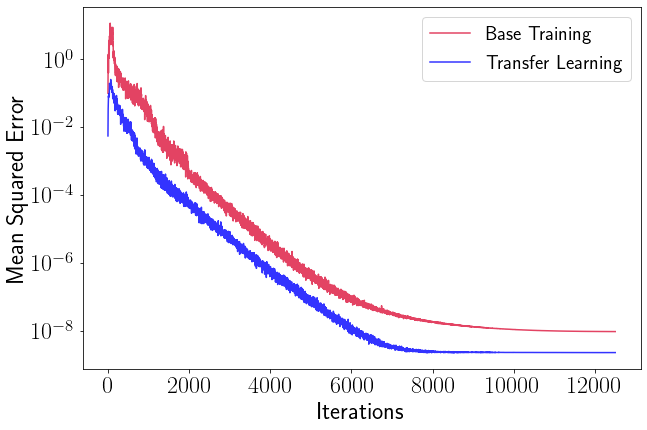

In [15]:
plt.rc('axes', titlesize=24, labelsize=24)
plt.rc('legend', fontsize=20)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rcParams['text.usetex'] = True

colors = ['crimson', 'blue']
n = 12500
fig, ax = plt.subplots(figsize=(10,6.67))
ax.plot(range(n), val_mses_base[:n], label="Base Training", color=colors[0], alpha=0.8)
ax.plot(range(n), val_mses_transfer[:n], label="Transfer Learning", color=colors[1], alpha=0.8)
ax.set_xlabel('Iterations')
ax.set_ylabel('Mean Squared Error')
ax.set_yscale('log')
ax.legend()
# plt.show()
plt.savefig('base_transfer_learning.png', bbox_inches='tight', dpi=300)